In [13]:
using Statistics, CSV, DataFramesMeta, LinearAlgebra
using Plots
using Optim, EasyFit

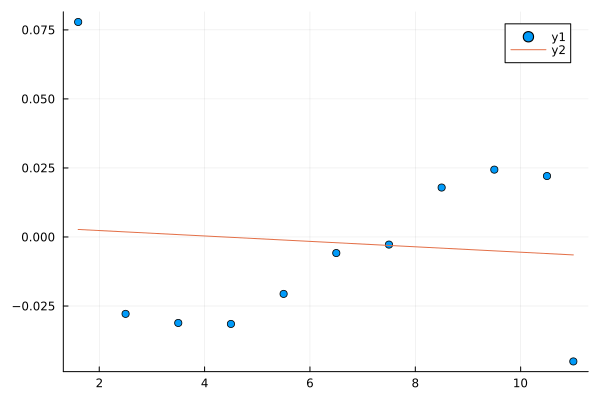

In [14]:
strs = [string("Data0",i,".csv") for i in 0:4]
dataarr = CSV.read.(strs, DataFrame)
ys = [dataarr[i][:,3] for i in eachindex(dataarr)]; ys=hcat(ys...);
xs = vcat(1.6, 2.5:1:10.5, 11, 10.5:-1:2.5, 1.6);
β_1 = cov(xs,ys) ./ var(xs) |> mean
β_0 = mean(ys) - β_1*mean(xs)

scatter(xs,ys, m=:xcross, legend=:none, 
    xlabel = "True Distance [cm]",
    ylabel = "Output Voltage [V]"
)
plot!(xs, (xs*β_1 .+ β_0))

δ = ys .- (xs*β_1 .+ β_0)
δmean = vcat(sum(δ[1:10,:] + δ[end:-1:12,:],dims=2)/2size(δ)[2], mean(δ[11,:]))
δxs = vcat(1.6,2.5:1:10.5,11)
δfit = fitlinear(δxs, δmean)

scatter(δxs, δmean)
plot!(δfit.x,δfit.y)

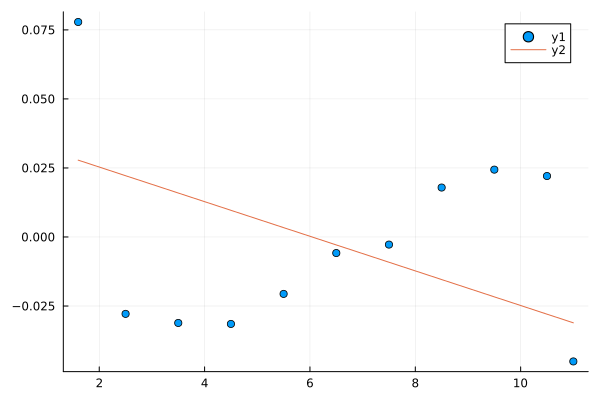

In [20]:
Lmax(y,y_hat) = norm(y-y_hat,Inf)
f(x) = Lmax(δmean, δxs*x[1] .+ x[2])
opt = optimize(f,[δfit.a, δfit.b])
Lfit = Optim.minimizer(opt)
L = Optim.minimum(opt)

scatter(δxs, δmean)
plot!(δxs, δxs*Lfit[1] .+ Lfit[2])

In [21]:
L

0.050029178612925704

In [22]:
tβ_1 = 1/β_1
tβ_0 = β_0/tβ_1
tβ_1,tβ_0
0.3519061565*tβ_1 + tβ_0 - (4.5210165977*tβ_1 + tβ_0)

-7.65205154502248